In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv("C:\\Users\\ADMIN\\ga_hktn2\\data\\train.csv")

In [3]:
train.describe()

,tweet_id,sentiment
count,7274.000000,7274.000000
mean,4531.736871,1.299148
std,2617.858745,0.607829
min,2.000000,0.000000
25%,2261.500000,1.000000
50%,4530.500000,1.000000
75%,6796.750000,2.000000
max,9092.000000,3.000000


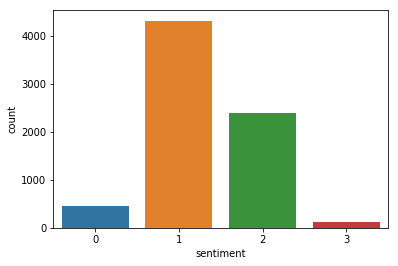

In [5]:
sns.countplot(x='sentiment',data=train)

In [6]:
train.isnull().any()

tweet_id     False
tweet         True
sentiment    False
dtype: bool

In [8]:
train.dropna(inplace=True)

In [11]:
train[train['tweet'].str.contains("<")]

,tweet_id,tweet,sentiment


In [97]:
results = set()

train['tweet'].str.lower().str.split().apply(results.update)

print(len(results))

14591


In [104]:
from nltk.corpus import stopwords
stop_words=set(stopwords.words('english'))
#print(stop_words)

#unique_without_stpwrd = [word for (word in list(results)) and (word not in stop_words)]
unq_word_list = results - stop_words
print(len(unq_word_list))

14446


In [131]:
def unq_word_count(tweet):
    lst1 = tweet.split()
    lst1 = list(set(lst1))
    lst2 = [w for w in lst1 if w in unq_word_list]
    return len(set(lst2))

In [132]:
train['uwc'] = train['tweet'].apply(unq_word_count)

In [133]:
train['uwc'].value_counts()

9     908
8     885
7     798
5     719
6     716
10    632
11    545
4     487
12    417
3     389
13    239
2     165
14    131
1      96
15     83
16     29
17     13
18     11
0       6
19      4
Name: uwc, dtype: int64

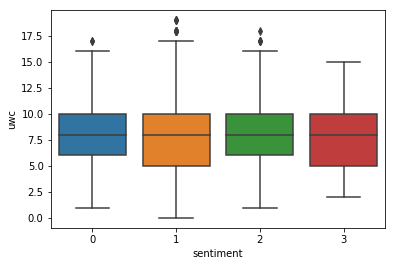

In [134]:
sns.boxplot(x=train['sentiment'],y=train['uwc'])

In [120]:
train['special_char_count'] = train['tweet'].map(lambda x: len(re.findall('\W', x.replace(' ',''))))

<input>:1: DeprecationWarning: invalid escape sequence \W
<input>:1: DeprecationWarning: invalid escape sequence \W
<input>:1: DeprecationWarning: invalid escape sequence \W
<ipython-input-120-446eac2dd133>:1: DeprecationWarning: invalid escape sequence \W
  train['special_char_count'] = train['tweet'].map(lambda x: len(re.findall('\W', x.replace(' ',''))))


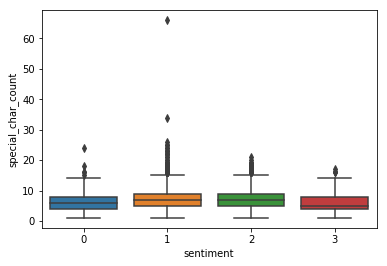

In [135]:
sns.boxplot(x=train['sentiment'],y=train['special_char_count'])

In [136]:
train['len_tweet'] = train['tweet'].apply(len)

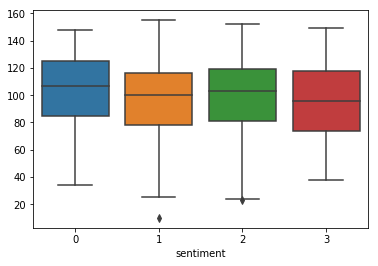

In [138]:
sns.boxplot(x=train['sentiment'],y=train['len_tweet']-train['special_char_count'])

In [168]:
from nltk.tokenize import word_tokenize
def n_words(tweet):
    return len(tweet.split())
    #tokens = nltk.word_tokenize(tweet)
    #return len(tokens)

In [169]:
train['n_wds'] = train['tweet'].apply(n_words)

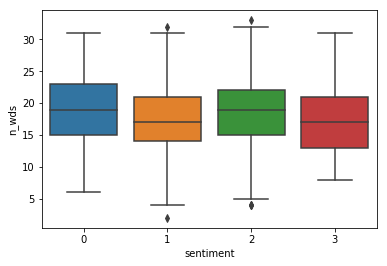

In [170]:
sns.boxplot(x=train['sentiment'],y=train['n_wds'])

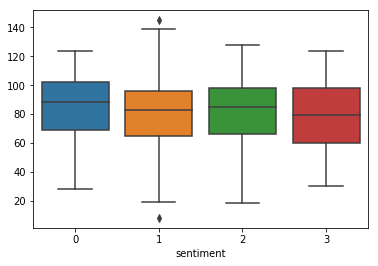

In [148]:
sns.boxplot(x=train['sentiment'],y=train['len_tweet']-train['n_wds'])

In [67]:
len(train['tweet'].str.split(' ', expand=True).stack().unique())

17001

In [66]:
train['tweet'].str.split(' ', expand=True).stack().value_counts()

@mention                5366
{link}                  3355
#sxsw                   3232
the                     3161
#SXSW                   2899
to                      2792
RT                      2312
at                      2289
for                     1944
a                       1729
in                      1433
of                      1343
iPad                    1322
Google                  1294
is                      1258
                        1254
and                     1194
Apple                   1154
on                       992
I                        782
store                    727
iPhone                   705
-                        697
2                        670
an                       667
with                     647
you                      628
up                       590
&amp;                    574
my                       566
                        ... 
#flashmob                  1
tomato,                    1
Move:                      1
iPad!!!!!     

In [12]:
negative_df = train[train['sentiment']==0]
neutral_df = train[train['sentiment']==1]
positive_df = train[train['sentiment']==2]
undecided_df = train[train['sentiment']==3]

In [15]:
import re

In [ ]:
'''#anything that is not a word, not a number, not a white space will be found outneg_spl = set(re.findall('\W', negative_df))
neu_spl = set(re.findall('\W', neutral_df))
pos_spl = set(re.findall('\W', positive_df))
cts_spl = set(re.findall('\W', undecided_df))
#Print statement
#unique number of special characters and the special characters in each tweet sentiment
print('Negative spl characters:', len(neg_spl))
print('Negative spl characters are:', neg_spl)
print('='*50)
print('Neutral spl characters:', len(neu_spl))
print('Neutral spl characters are:', neu_spl)
print ('='*50)

print('Positive spl characters:', len(pos_spl))
print('Positive spl characters are:', pos_spl)
print ('='*50)
print('Undecided spl characters:', len(cts_spl))
print('Undecided spl characters are:', cts_spl)'''

In [110]:
import nltk
from nltk.tokenize import TreebankWordTokenizer

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
#vect = CountVectorizer()

vect = TfidfVectorizer()

tokenizer = TreebankWordTokenizer()
vect.set_params(tokenizer=tokenizer.tokenize)

# remove English stop words
vect.set_params(stop_words='english')

# include 1-grams and 2-grams
vect.set_params(ngram_range=(1, 1))

# ignore terms that appear in more than 50% of the documents
vect.set_params(max_df=0.5)

# only keep terms that appear in at least 2 documents
vect.set_params(min_df=2)

#vect.set_params(token_pattern=r'(?u)\b[A-Za-z]+{4,}\b')

#/[0-9a-zA-Z]{6,}/

#vect.set_params(token_pattern=r'/[0-9a-zA-Z]{6,}/')

#r'\b[a-zA-Z0-9]{3,}\b'

vect.set_params(token_pattern=r'\b[a-zA-Z0-9]{3,}\b')

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=0.5, max_features=None,
                min_df=2, ngram_range=(1, 1), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words='english', strip_accents=None,
                sublinear_tf=False, token_pattern='\\b[a-zA-Z0-9]{3,}\\b',
                tokenizer=<bound method TreebankWordTokenizer.tokenize of <nltk.tokenize.treebank.TreebankWordTokenizer object at 0x192195F0>>,
                use_idf=True, vocabulary=None)

In [92]:
vect.fit(train['tweet'])

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=0.5, max_features=None,
                min_df=2, ngram_range=(1, 1), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words='english', strip_accents=None,
                sublinear_tf=False, token_pattern='\\b[a-zA-Z0-9]{3,}\\b',
                tokenizer=<bound method TreebankWordTokenizer.tokenize of <nltk.tokenize.treebank.TreebankWordTokenizer object at 0x185AECB0>>,
                use_idf=True, vocabulary=None)

In [93]:
print(vect.get_feature_names()[:50])
print(len(vect.get_feature_names()))

['!', '$', '%', '&', "'", "'80s-themed", "'checkout", "'circles", "'d", "'em", "'enchanted", "'fast", "'get", "'google", "'humorous", "'i", "'ll", "'lots", "'m", "'major", "'matt", "'michaels", "'popping", "'power", "'re", "'registers", "'s", "'saving", "'ve", "'very", "'where", "'your", '(', ')', '*another', '*everyone', '*sigh*', '*south', '*spark', '+', '+1', '+others', ',', '-', '--', '-/', '-\\', '-but', '-d', '-google']
5263


In [78]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train['tweet'], 
                                    train['sentiment'], train_size = 0.8)

In [79]:
X_train = pd.Series(X_train)
X_test = pd.Series(X_test)

X_train.head()

3341    RT @mention Apple opening a pop up store in do...
452     RT @mention Post: SXSWi 2011. Day 1. #BPM @men...
5034    RT @mention Celebrate Beauty of the Web @menti...
6649    RT @mention Who is flying to #SXSW and wants s...
2521    Awesome! RT @mention What happens when #Apple ...
Name: tweet, dtype: object

In [111]:
vect.fit(X_train)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=0.5, max_features=None,
                min_df=2, ngram_range=(1, 1), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words='english', strip_accents=None,
                sublinear_tf=False, token_pattern='\\b[a-zA-Z0-9]{3,}\\b',
                tokenizer=<bound method TreebankWordTokenizer.tokenize of <nltk.tokenize.treebank.TreebankWordTokenizer object at 0x192195F0>>,
                use_idf=True, vocabulary=None)

In [112]:
vect.get_feature_names()[:50]

['!',
 '$',
 '%',
 '&',
 "'",
 "'80s-themed",
 "'checkout",
 "'circles",
 "'d",
 "'em",
 "'fast",
 "'get",
 "'google",
 "'humorous",
 "'i",
 "'ll",
 "'m",
 "'major",
 "'matt",
 "'michaels",
 "'popping",
 "'power",
 "'re",
 "'registers",
 "'s",
 "'saving",
 "'ve",
 "'where",
 "'your",
 '(',
 ')',
 '*everyone',
 '*sigh*',
 '*south',
 '*spark',
 '+',
 '+1',
 '+others',
 ',',
 '-',
 '--',
 '-/',
 '-kek',
 '-marissa',
 '-mayer.',
 '-possibly',
 '.',
 '..',
 '...',
 '..sitting']

In [113]:
train_vectors = vect.transform(X_train)
train_vectors

<5818x4493 sparse matrix of type '<class 'numpy.float64'>'
	with 69558 stored elements in Compressed Sparse Row format>

In [114]:
test_vectors = vect.transform(X_test)
test_vectors

<1455x4493 sparse matrix of type '<class 'numpy.float64'>'
	with 16495 stored elements in Compressed Sparse Row format>

In [61]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
nb = GaussianNB()
bnb = BernoulliNB()

In [115]:
nb.fit(train_vectors.toarray(), y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [116]:
from sklearn.metrics.classification import classification_report, accuracy_score
                                        
from sklearn.model_selection import cross_val_predict

# generate your cross-validation prediction with 10 fold 
#Stratified sampling
y_pred = cross_val_predict(nb, test_vectors.toarray(), y_test, cv=10)

print(classification_report(y_test, y_pred))
print("ACCURACY::",accuracy_score(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.19      0.24      0.21       103
           1       0.65      0.51      0.57       858
           2       0.41      0.54      0.46       469
           3       0.00      0.00      0.00        25

    accuracy                           0.49      1455
   macro avg       0.31      0.32      0.31      1455
weighted avg       0.53      0.49      0.50      1455

ACCURACY:: 0.49209621993127145


In [117]:
bnb.fit(train_vectors.toarray(), y_train)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [118]:
y_pred = cross_val_predict(bnb, test_vectors.toarray(), y_test, cv=10)

print(classification_report(y_test, y_pred))
print("ACCURACY::",accuracy_score(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       103
           1       0.62      0.95      0.75       858
           2       0.61      0.18      0.27       469
           3       0.00      0.00      0.00        25

    accuracy                           0.62      1455
   macro avg       0.31      0.28      0.26      1455
weighted avg       0.56      0.62      0.53      1455

ACCURACY:: 0.6164948453608248


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [ ]:
from imblearn.over_sampling import SMOTE, ADASYN
train_vec_resampled, y_train_resampled = SMOTE().fit_sample(train_vectors.toarray(), y_train)

In [171]:
X_1_train, X_1_test, y_1_train, y_1_test = train_test_split(train[['tweet','n_wds']], 
                                    train['sentiment'], train_size = 0.8)

In [172]:
X_1_train.shape

(5818, 2)

In [173]:
X_1_train['n_wds'].isnull().sum()

0

In [174]:
vect.fit(X_1_train['tweet'])

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=0.5, max_features=None,
                min_df=2, ngram_range=(1, 1), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words='english', strip_accents=None,
                sublinear_tf=False, token_pattern='\\b[a-zA-Z0-9]{3,}\\b',
                tokenizer=<bound method TreebankWordTokenizer.tokenize of <nltk.tokenize.treebank.TreebankWordTokenizer object at 0x192195F0>>,
                use_idf=True, vocabulary=None)

In [175]:
train_1_vectors = vect.transform(X_1_train['tweet'])
train_1_vectors.shape

(5818, 4465)

In [176]:
train_1_df = pd.DataFrame(train_1_vectors.toarray(), columns=vect.get_feature_names())

In [195]:
train_1_df['n_wds'] = X_1_train['n_wds'].values

In [196]:
print(X_1_train['n_wds'].isnull().sum())
print(train_1_df['n_wds'].isnull().sum())

print(X_1_train['n_wds'].shape)
print(train_1_df['n_wds'].shape)

#train_1_df[train_1_df['n_wds'].isnull()].index.tolist()

print(train_1_df['n_wds'].head(20))
print(X_1_train['n_wds'].head(20))


0
0
(5818,)
(5818,)
0     20
1     12
2     13
3     19
4     15
5     23
6     18
7     22
8     14
9     16
10    21
11    23
12    25
13    16
14    12
15    24
16    19
17    15
18    26
19    16
Name: n_wds, dtype: int64
3725    20
2196    12
6454    13
4106    19
750     15
5296    23
837     18
2653    22
3404    14
2790    16
3669    21
7212    23
7246    25
4302    16
6236    12
1455    24
1285    19
6728    15
6748    26
194     16
Name: n_wds, dtype: int64


In [191]:
X_1_train['n_wds'].iloc[9]

16

In [192]:
train_1_df['n_wds'].iloc[9]

15.0

In [197]:
test_1_vectors = vect.transform(X_1_test['tweet'])
test_1_vectors

<1455x4465 sparse matrix of type '<class 'numpy.float64'>'
	with 16651 stored elements in Compressed Sparse Row format>

In [198]:
test_1_df = pd.DataFrame(test_1_vectors.toarray(), 
             columns=vect.get_feature_names())

test_1_df['n_wds'] = X_1_test['n_wds'].values

In [199]:
nb.fit(train_1_df, y_1_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [200]:

y_1_pred = cross_val_predict(nb, test_1_df, y_1_test, cv=10)

print(classification_report(y_1_test, y_1_pred))
print("ACCURACY::",accuracy_score(y_1_pred, y_1_test))

              precision    recall  f1-score   support

           0       0.08      0.10      0.09        81
           1       0.66      0.52      0.58       874
           2       0.41      0.56      0.47       473
           3       0.04      0.04      0.04        27

    accuracy                           0.50      1455
   macro avg       0.30      0.30      0.30      1455
weighted avg       0.54      0.50      0.51      1455

ACCURACY:: 0.5003436426116838


In [201]:
bnb.fit(train_1_df, y_1_train)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [202]:
y_1_pred = cross_val_predict(bnb, test_1_df, y_1_test, cv=10)

print(classification_report(y_1_test, y_1_pred))
print("ACCURACY::",accuracy_score(y_1_pred, y_1_test))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        81
           1       0.63      0.97      0.76       874
           2       0.69      0.18      0.28       473
           3       0.00      0.00      0.00        27

    accuracy                           0.64      1455
   macro avg       0.33      0.29      0.26      1455
weighted avg       0.60      0.64      0.55      1455

ACCURACY:: 0.6378006872852233


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


1156